This notebook is a short tutorial on how to read in a PebbleCounts .csv file. You could always open these in a spreadsheet software like Excel, but why not learn some Python. 

-Ben Purinton; August 18th, 2021

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
from matplotlib import pyplot as plt

# The File

The .csv files have some different sections for the different data output by PebbleCounts. These sections are:

1. **PebbleCounts Parameters**: One row for the image containing the parameters used in the PebbleCounts run which generated the file.


2. **Image Details**: One row for the image with the "perc. not meas." (percent not measured) and "perc. background color" (percent background color; i.e., areal percentage of sand or smooth compacted surfaces).


3. **Pebble Details**: N-rows, where N is the number of pebbles counted, containing the grain-size data.

The first two pieces of information can be read in as a Python dictionary, and the last item (grain-size data) we will read in as a Pandas dataframe.

Here is what the file looks like when you open it with a spreadsheet software:

![](docs/figs/output_csv.png)


# PebbleCounts (k-means manual selection; KMS)

First we will open and plot output from the KMS (`PebbleCounts.py`) algorithm.

## Select CSV

**Note:** If you don't have the file below in the `example_data` folder, then you need to run `PebbleCounts.py` to produce it. Or just follow along with the notebook without it and copy-paste the code you need into your own projects. This file was generated with the following command (and manual clicking):

```
python PebbleCounts.py -im example_data\ortho_resolution_1.2mmPerPix.tif -ortho y -maxGS 0.3 
```

In [2]:
fn = 'example_data/ortho_resolution_1.2mmPerPix_PebbleCounts_CSV.csv'

## Read PebbleCounts Parameters

First we'll read the first line with the parameters from the run.

**Note:** The `skiprows` and `nrows` parameter are very important and should not be changed. This is standardized across all PebbleCounts .csv outputs!

In [3]:
params = pd.read_csv(fn, skiprows=1, nrows=1).T.to_dict()[0]

This is now a Python dictionary, which you can read items from

In [4]:
params

{'otsu_threshold': 50.0,
 'maxGS': 0.3,
 'cutoff': 20,
 'min_sz_factors': '[50, 5, 1]',
 'win_sz_factors': '[10, 3, 2]',
 'improvement_ths': '[0.01, 0.1, 0.1]',
 'coordinate_scales': '[0.5, 0.5, 0.5]',
 'overlaps': '[0.5, 0.3, 0.1]',
 'first_nl_denoise': 5,
 'nl_means_chroma_filts': '[3, 2, 1]',
 'bilat_filt_szs': '[9, 5, 3]',
 'tophat_th': 90,
 'sobel_th': 90,
 'canny_sig': 2}

In [5]:
print(params['tophat_th'])

90


One thing to note: We need the function imported above `literal_eval` to read the list-type items (e.g., `min_sz_factors`) in the above dictionary. When the algorithm saves the data to a .csv file, the list items are converted into strings.

In [6]:
type(params['min_sz_factors'])

str

In [7]:
print(literal_eval(params['min_sz_factors']))
print(type(literal_eval(params['min_sz_factors'])))

[50, 5, 1]
<class 'list'>


## Read Image Details

We can also read in the image details (percent unmeasured and percent background color). 

**Note:** The `skiprows` and `nrows` parameter are very important and should not be changed. This is standardized across all PebbleCounts .csv outputs!

In [8]:
tile_details = pd.read_csv(fn, skiprows=5, nrows=1).T.to_dict()[0]

In [9]:
tile_details

{'perc. not meas.': 80.56790000000001, 'perc. background color': 17.446}

## Read and Plot Pebbles

And finally, the main event: grain-size data. Now we will use a pandas dataframe.

**Note:** The `skiprows` and `nrows` parameter are very important and should not be changed. This is standardized across all PebbleCounts .csv outputs!

In [10]:
pebbles = pd.read_csv(fn, skiprows=9)

In [11]:
pebbles

,UTM X (m),UTM Y (m),a (px),b (px),a (m),b (m),area (px),area (m2),orientation,ellipse area (px),perc. diff. area
0,836644.2878,7242472.866,87.024678,55.856531,0.104462,0.067049,3401,0.004900,-2.309977,3807.285687,10.671269
1,836644.5051,7242472.819,91.028929,55.045931,0.109269,0.066076,3433,0.004947,-2.527877,3924.675289,12.527795
2,836644.6023,7242472.809,46.619508,38.267768,0.055961,0.045936,1288,0.001856,-0.218997,1397.332929,7.824401
3,836644.5159,7242472.703,150.841046,69.113499,0.181065,0.082962,7258,0.010458,-2.214070,8165.475866,11.113570
4,836644.1702,7242472.628,114.262068,108.564897,0.137157,0.130318,8869,0.012779,-3.002590,9716.068830,8.718226
...,...,...,...,...,...,...,...,...,...,...,...
64,836644.9420,7242472.026,68.150933,55.956297,0.081806,0.067168,2631,0.003791,-1.690621,2986.894275,11.915195
65,836645.0608,7242472.013,49.360133,36.526219,0.059251,0.043845,1106,0.001594,-2.726250,1412.147675,21.679579
66,836644.9168,7242471.961,80.284876,42.840646,0.096372,0.051425,2194,0.003161,-2.755353,2693.945657,18.558120
67,836645.0932,7242471.847,37.748005,31.099214,0.045312,0.037331,819,0.001180,-2.054698,919.480448,10.927959


We can pull out a column, in this case the b-axes of all pebbles measured.

In [12]:
b_axes_KMS = pebbles['b (m)'].to_numpy(copy=True)

Let's convert that from meters to $\psi$ units, where $\psi=log_2(mm)$

In [13]:
b_axes_KMS = np.log2(b_axes_KMS * 1000)

And plot the CDF, or grain-size distribution.

Text(0, 0.5, 'CDF')

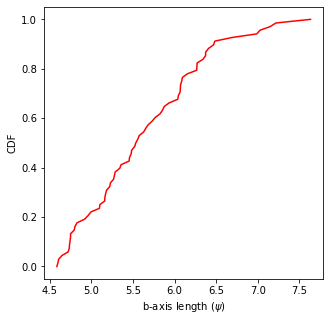

In [14]:
plt.figure(figsize=(5,5))
plt.plot(sorted(b_axes_KMS), np.linspace(0, 1, len(b_axes_KMS)), color='r')
plt.xlabel('b-axis length ($\psi$)')
plt.ylabel('CDF')

# PebbleCountsAuto (automatic with image filtering; AIF)

Now we will repeat all of that for a `PebbleCountsAuto.py` (AIF algorithm) .csv file.

## Select CSV

**Note:** If you don't have the file below in the `example_data` folder, then you need to run `PebbleCountsAuto.py` to produce it. Or just follow along with the notebook without it and copy-paste the code you need into your own projects. This file was generated with the following command (assuming you have already clicked and generated the sand mask .tif file in the previous step):

```
python PebbleCountsAuto.py -im example_data\ortho_resolution_1.2mmPerPix.tif -ortho y -sand_mask example_data\ortho_resolution_1.2mmPerPix_PebbleCounts_SandMask_TIFF.tif -otsu_th 50
```

In [15]:
fn = 'example_data/ortho_resolution_1.2mmPerPix_PebbleCountsAuto_CSV.csv'

## Read PebbleCounts Parameters

In [16]:
params = pd.read_csv(fn, skiprows=1, nrows=1).T.to_dict()[0]

In [17]:
params

{'otsu_threshold': 45.0,
 'cutoff': 20.0,
 'percent_overlap': 15.0,
 'misfit_threshold': 30.0,
 'min_size_threshold': 10.0,
 'first_nl_denoise': 5.0,
 'tophat_th': 85.0,
 'sobel_th': 85.0,
 'canny_sig': 2.0}

There are no list-type entries in the case of `PebbleCountsAuto.py` parameters, so we don't need to worry about the `literal_eval` function as we did above.

## Read Image Details

In [18]:
tile_details = pd.read_csv(fn, skiprows=5, nrows=1).T.to_dict()[0]

In [19]:
tile_details

{'perc. not meas.': 50.78, 'perc. background color': 22.8574}

## Read and Plot Pebbles

In [20]:
pebbles = pd.read_csv(fn, skiprows=9)

In [21]:
pebbles

,UTM X (m),UTM Y (m),a (px),b (px),a (m),b (m),area (px),area (m2),orientation,ellipse area (px),perc. diff. area
0,836644.287800,7.242473e+06,91.099302,56.929474,0.109353,0.068337,3585,0.005166,-2.346842,4062.106433,11.745296
1,836644.664717,7.242473e+06,87.562741,73.385072,0.105108,0.088089,4281,0.006168,-2.740125,5032.990990,14.941235
2,836644.431844,7.242473e+06,44.341632,23.999295,0.053226,0.028808,678,0.000977,-1.838869,833.506962,18.656948
3,836644.506268,7.242473e+06,92.439524,58.495033,0.110962,0.070216,3794,0.005467,-2.370185,4235.218002,10.417835
4,836644.113746,7.242473e+06,33.943588,24.522035,0.040745,0.029436,505,0.000728,-0.035510,651.948572,22.539902
...,...,...,...,...,...,...,...,...,...,...,...
75,836645.099251,7.242472e+06,46.812721,32.803184,0.056193,0.039376,1090,0.001571,-2.607045,1202.759965,9.375101
76,836645.214487,7.242472e+06,74.834690,36.298176,0.089829,0.043571,1910,0.002752,-0.057553,2127.584663,10.226839
77,836645.141264,7.242472e+06,64.393964,47.678347,0.077297,0.057232,2070,0.002983,-0.485613,2404.725066,13.919473
78,836644.123349,7.242472e+06,50.170835,25.534225,0.060224,0.030651,905,0.001304,-2.647203,1003.397672,9.806448


In [22]:
b_axes_AIF = pebbles['b (m)'].to_numpy(copy=True)

In [23]:
b_axes_AIF = np.log2(b_axes_AIF * 1000)

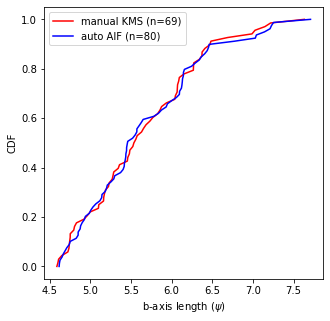

In [24]:
plt.figure(figsize=(5,5))
plt.plot(sorted(b_axes_KMS), np.linspace(0, 1, len(b_axes_KMS)), color='r', label='manual KMS (n={})'.format(len(b_axes_KMS)))
plt.plot(sorted(b_axes_AIF), np.linspace(0, 1, len(b_axes_AIF)), color='b', label='auto AIF (n={})'.format(len(b_axes_AIF)))
plt.xlabel('b-axis length ($\psi$)')
plt.ylabel('CDF')
plt.legend()

Pretty similar results, looks like we might be able to trust out automatic measurements for this area. Read more on that topic here: https://doi.org/10.1029/2021JF006260.